In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import asyncio
import numpy as np


LOG.propagate = False

In [107]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2022-05-20 17:07:54,386 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:A5:6D:02:3C
2022-05-20 17:08:01,668 | INFO     |: Connected to C0:83:A5:6D:02:3C


In [108]:
# Instantiate RobotControl class (in controller.py)
from controller import *

In [109]:
rc = RobotControl(ble)

In [110]:
rc.start_pid()

In [111]:
rc.stop_pid()

2022-05-20 17:09:28,766 | INFO     |: Disconnected from C41C2988-2D80-83DC-22C0-8EF57D41E2E4


In [348]:
rc.stunt()

In [11]:
rc.stop_recording()

In [250]:
rc.latest_front_tof_reading

3717.0

In [204]:
# Start spinning!
rc.spin_360(95)

In [178]:
# Make sure to call this after the spin motion stops. This terminates data collection.
rc.stop_recording()

In [191]:
sr = deque([
       (200, '10.0'),
       (200, '10.0'),
       (200, '10.1'),
       (200, '10.1'),
       (200, '10.2'),
       (200, '10.3'),
       (200, '10.3'),
       (200, '10.4'),
       (200, '10.4'),
       (200, '10.5'),
       (200, '10.6'),
       (200, '10.7'),
       (200, '10.8'),
       (200, '10.9'),
       (200, '11.0'),
       (200, '11.0'),
       (200, '11.1'),
       (200, '11.1'),
       (200, '11.2'),
       (200, '11.3'),
       (200, '11.3'),
       (200, '11.4'),
       (200, '11.4'),
       (200, '11.5'),
       (200, '11.6'),
       (200, '11.7'),
       (200, '11.8'),
       (200, '11.9'),
       (200, '12.0'),
       (200, '12.0'),
       (200, '12.1'),
       (200, '12.1'),
       (200, '12.2'),
       (-200, '12.3'),
       (-200, '12.3'),
       (-200, '12.4'),
       (-200, '12.4'),
       (-200, '12.5'),
       (-200, '12.6'),
       (-200, '12.7'),
       (-200, '12.8'),
       (-200, '12.9'),
       (-200, '13.0'),
       (-200, '13.1'),
       (-200, '13.1'),
       (-200, '13.2'),
       (-200, '13.3'),
       (0, '13.3'),
       (0, '13.4'),
       (0, '13.4'),
       (0, '13.5'),
       (0, '13.6'),
       (0, '13.7'),
       (0, '13.7'),
       (0, '13.8'),
       (-200, '13.8'),
       (-200, '13.8'),
       (-200, '13.9'),
       (-200, '13.9'),
       (-200, '14.0'),
       (-200, '14.1'),
       (-200, '14.1'),
       (-200, '14.2')])

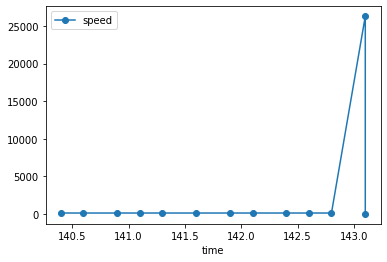

In [20]:
# speed_readings = np.array([(float(r[1]), r[0] * 1.275) for r in sr])
speed_readings = np.array([(float(r[1]), r[0]) for r in rc.speed_readings])

def plot_speed(ndarr):
    cols = ["time", "speed"]
    # df = pd.DataFrame(ndarr[:, [0, 2, 8]], columns=cols)
    df = pd.DataFrame(ndarr[:, :], columns=cols)
    df.plot(x=cols[0], y=cols[1:], marker="o")
    plt.savefig('pwm_values.png', bbox_inches='tight')
    plt.show()
    
    return df

pwm = plot_speed(speed_readings)

# Collect & display the full sensor data
# speed_cols = [
#     "time", "speed"
# ]
# speed_data = pd.DataFrame(rc.speed_readings, columns=cols)

In [21]:
pwm

,time,speed
0,140.4,120.0
1,140.6,120.0
2,140.9,120.0
3,141.1,120.0
4,141.3,120.0
5,141.6,120.0
6,141.9,120.0
7,142.1,120.0
8,142.4,120.0
9,142.6,120.0


In [22]:
# Collect & display the full sensor data
cols = [
    "time", "dist_r", "dist_f", "acc_x", "acc_y", "acc_z", "gyr_x",
    "gyr_y", "gyr_z", "mag_x", "mag_y", "mag_z", "temp"
]
sensor_data = pd.DataFrame(rc.sensor_arr, columns=cols)

In [23]:
sensor_data

,time,dist_r,dist_f,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,temp
0,140.039,1215.0,2847.0,-25.390,-48.828,1060.580,1.297,0.145,1.220,227.550,-1087.500,121.800,28.604
1,140.234,1217.0,2826.0,-41.992,-34.179,1049.316,-1.244,2.129,-1.190,228.000,-1088.250,121.500,28.365
2,140.474,1217.0,2842.0,-451.171,577.636,48.339,-10.778,-49.488,7.656,192.899,-1080.750,138.000,28.556
3,140.713,1221.0,2821.0,-541.503,477.539,456.540,-16.984,-38.220,-4.923,291.149,-1122.750,108.150,28.556
4,140.939,1271.0,2664.0,-923.828,-684.820,1808.105,49.969,-13.300,12.351,252.600,-1127.990,175.649,28.413
5,141.179,998.0,2371.0,429.199,169.433,-731.933,15.877,-71.923,3.984,186.149,-1116.750,181.949,28.604
6,141.420,934.0,1989.0,-1573.242,-1249.511,1999.938,-59.832,-16.801,-9.877,212.100,-1083.300,160.649,28.604
7,141.689,2041.0,1515.0,1192.382,260.253,-1095.703,-50.000,50.129,-5.793,204.750,-1087.500,187.800,28.508
8,141.929,1080.0,953.0,-1102.539,1999.938,-630.371,3.251,-25.412,-10.870,241.500,-1081.949,163.500,28.700
9,142.184,232.0,206.0,-612.304,-91.308,-120.605,-196.587,-250.137,-250.137,237.750,-1114.500,232.199,28.508


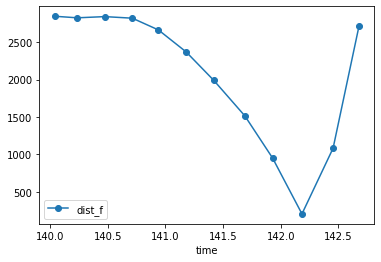

In [47]:
# Currently, only configured to plot the "gyr_z" values
# plot_sensor_data(rc.sensor_arr, save_path="front_tof_values.png")
dist_f = plot_sensor_data(rc.sensor_arr, "dist_f4.png")

In [48]:
dist_f

,time,dist_f
0,140.039,2847.0
1,140.234,2826.0
2,140.474,2842.0
3,140.713,2821.0
4,140.939,2664.0
5,141.179,2371.0
6,141.420,1989.0
7,141.689,1515.0
8,141.929,953.0
9,142.184,206.0


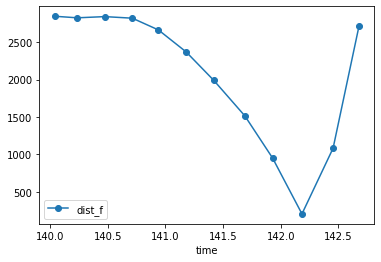

In [49]:
plot_df(dist_f)

In [50]:
vel_f = convert_dist_to_vel(dist_f)

In [51]:
vel_f

,time,dist_f,vel_f
0,140.039,2847.0,NaN
1,140.234,2826.0,-107.692308
2,140.474,2842.0,66.666667
3,140.713,2821.0,-87.866109
4,140.939,2664.0,-694.690265
5,141.179,2371.0,-1220.833333
6,141.420,1989.0,-1585.062241
7,141.689,1515.0,-1762.081784
8,141.929,953.0,-2341.666667
9,142.184,206.0,-2929.411765


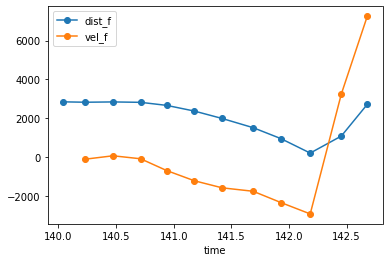

In [52]:
plot_df(vel_f, "vel_f4.png")

In [53]:
pwm

,time,speed
0,140.4,120.0
1,140.6,120.0
2,140.9,120.0
3,141.1,120.0
4,141.3,120.0
5,141.6,120.0
6,141.9,120.0
7,142.1,120.0
8,142.4,120.0
9,142.6,120.0


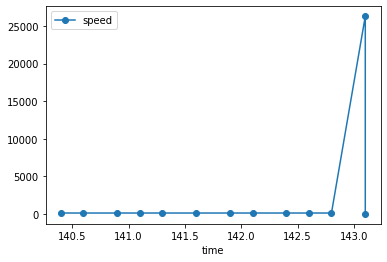

In [54]:
plot_df(pwm, "pwm4.png")

In [56]:
new_pwm = dist_f.copy()
new_pwm["pwm"] = new_pwm.apply(lambda row: 120.0 if row["time"] < 143.1 else 0.0, axis=1)
new_pwm.drop(columns=["dist_f", "vel_f"], inplace=True)

In [57]:
new_pwm

,time,pwm
0,140.039,120.0
1,140.234,120.0
2,140.474,120.0
3,140.713,120.0
4,140.939,120.0
5,141.179,120.0
6,141.420,120.0
7,141.689,120.0
8,141.929,120.0
9,142.184,120.0


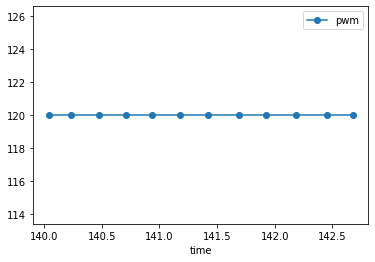

In [58]:
plot_df(new_pwm, "pwm4.png")

In [59]:
gyr_z = pd.DataFrame(rc.sensor_arr[:, [0, 8]], columns=["time", "gyr_z"])

In [60]:
gyr_z

,time,gyr_z
0,140.039,1.220
1,140.234,-1.190
2,140.474,7.656
3,140.713,-4.923
4,140.939,12.351
5,141.179,3.984
6,141.420,-9.877
7,141.689,-5.793
8,141.929,-10.870
9,142.184,-250.137


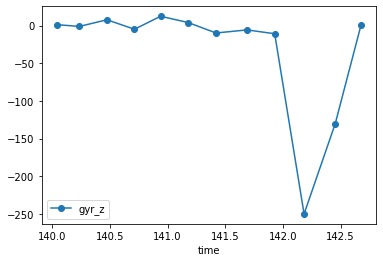

In [61]:
plot_df(gyr_z)

In [62]:
dist_f["time"].diff().mean()

0.24000000000000135

In [73]:
# Initial state uncertainty 
sig = np.array([[5**2,0],[0,5**2]])

d = 4e-4   # drag
m = 2.61e-4 # mass

# A, B, C matrices
A = np.array([[0,1],[0,-d/m]])
B = np.array([[0],[1/m]])
C = np.array([[-1,0]])

# Process and sensor noise
sig_u = np.array([[10**2,0],[0,10**2]])
sig_z = np.array([[20**2]])

# Discretize A and B
delta_t = dist_f["time"].diff().mean()
Ad = np.eye(2) + delta_t * A
Bd = delta_t * B

# Initial state
x = np.array([[-dist_f["dist_f"][0]],[0]])

# KF estimation
def kf(x,u,sig,y):
    
    x_p = Ad.dot(x) + Bd.dot(u)                      # predicted state
    sig_p = Ad.dot(sig.dot(Ad.transpose())) + sig_u  # predicted state uncertainty
    
    y_m = y-C.dot(x_p)
    sig_m = C.dot(sig_p.dot(C.transpose())) + sig_z
    
    kf_gain = sig_p.dot(C.transpose().dot(np.linalg.inv(sig_m)))  # KF gain

    x_n   = x_p + kf_gain.dot(y_m)                   # new state 
    sig_n = (np.eye(2) - kf_gain.dot(C)).dot(sig_p)  # new state uncertainty

    return x_n, sig_n

In [74]:
# Run code
kf_state = []
for u, d in zip(new_pwm["pwm"], dist_f["dist_f"]):
    x, sig = kf(x, [[u/80]], sig, [[d]])
    kf_state.append(x[:,0])

In [91]:
kf_df = dist_f.copy()
kf_df.drop(columns=["dist_f", "vel_f"], inplace=True)
temp_kf_df = pd.DataFrame(kf_state, columns=["new_dist_f", "new_vel_f"])
kf_df = pd.concat((dist_f, temp_kf_df), axis=1)

In [92]:
kf_df

,time,dist_f,vel_f,new_dist_f,new_vel_f
0,140.039,2847.0,NaN,-2847.000000,1379.310345
1,140.234,2826.0,-107.692308,-2620.607418,2241.785554
2,140.474,2842.0,66.666667,-2374.052242,2762.014206
3,140.713,2821.0,-87.866109,-2159.632408,3067.282528
4,140.939,2664.0,-694.690265,-1935.285464,3249.907415
5,141.179,2371.0,-1220.833333,-1661.069208,3365.429052
6,141.420,1989.0,-1585.062241,-1327.384958,3442.534318
7,141.689,1515.0,-1762.081784,-924.896167,3498.052037
8,141.929,953.0,-2341.666667,-448.163853,3541.416513
9,142.184,206.0,-2929.411765,147.589059,3583.591150


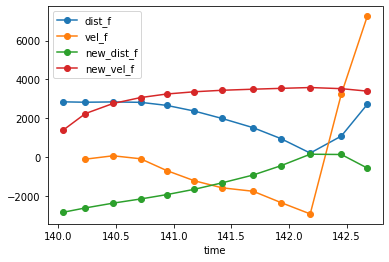

In [95]:
kf_df["new_dist_f"] *= -1
kf_df["new_vel_f"] *= -1
plot_df(kf_df, "kf4.png")

In [77]:
kf_df.drop(columns=["time"], inplace=True)
new_kf_df = pd.concat((dist_f, kf_df), axis=1)
new_kf_df["new_dist_f"] *= -1

In [78]:
# Optional to combine orig vel data
new_kf_df.drop(columns=["time"], inplace=True)
new_kf_df = pd.concat((vel_f, new_kf_df), axis=1)
new_kf_df["vel_f"] *= -1

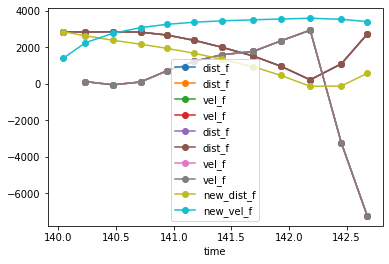

In [79]:
plot_df(new_kf_df, "kf_with_orig_dist_vel3.png")

In [39]:
# This is where we do the polar plot stuff...
import math
from matplotlib import pyplot as plt

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265 3.4906585  3.83972435
 4.1887902  4.53785606 4.88692191 5.23598776 5.58505361 5.93411946]
Actual number of data points (including the excluded latter points collected after spin stopped): 23

Plot data:
Time: [3.186, 3.877, 4.536, 5.122, 5.722, 6.307, 6.862, 7.462, 8.031, 8.617, 9.217, 9.786, 10.357, 10.941, 11.541, 12.126, 12.711, 13.267]
Distance: [101.0, 110.0, 146.0, 150.0, 103.0, 83.0, 80.0, 96.0, 147.0, 219.0, 197.0, 195.0, 216.0, 283.0, 216.0, 174.0, 163.0, 179.0]
Angle (rad):  ['0.00', '0.35', '0.70', '1.05', '1.40', '1.75', '2.09', '2.44', '2.79', '3.14', '3.49', '3.84', '4.19', '4.54', '4.89', '5.24', '5.59', '5.93']


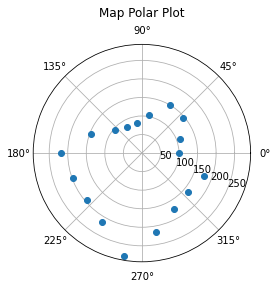

In [54]:
times = list(sensor_data["time"][:18])
tofs = sensor_data["dist_f"][:18]
ang_vels = list(sensor_data["gyr_z"])
# ang_vels = list(np.tile(np.array([22.5]), len(tofs)))
num_points = len(ang_vels)

# thetas = [0]
# for i in range(1, num_points):
#     thetas.append(thetas[i-1] + math.radians(ang_vels[i] * (times[i] - times[i-1])))
thetas = np.linspace(0, 2 * np.pi, len(tofs), endpoint=False)
print(thetas)

xs = np.cos(thetas) * tofs
ys = np.sin(thetas) * tofs

r = np.array(tofs)
theta = np.array(thetas)

print(f"Actual number of data points (including the excluded latter points collected after spin stopped): {num_points}\n")

print("Plot data:")
print(f"Time: {repr(times)}")
print(f"Distance: {repr(list(r))}")
print("Angle (rad): ", ["{:0.2f}".format(x) for x in theta ])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r, 'o')
# ax.set_rmax(2000)
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Map Polar Plot", va='bottom')
plt.show()

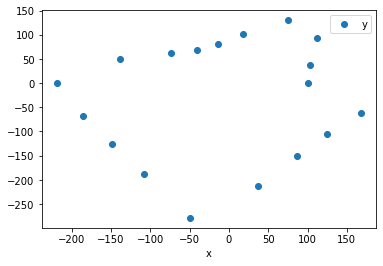

In [55]:
df = pd.concat([xs.rename("x"), ys.rename("y")], axis=1)
df.plot(x="x", y="y", marker="o", linestyle='none')
plt.show()

In [47]:
ble.disconnect()

2022-05-13 16:03:27,560 | INFO     |: Disconnected from B45C71B2-3BCA-639D-7AF3-3C14C2003C3E
